In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import os # need for file enumeration
import random
from sklearn.model_selection import train_test_split


# CNN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,LeakyReLU

# pre-trained
from tensorflow.keras.applications import VGG19,EfficientNetB4


# garbage collector to clean memory after modeling
import gc

# reloads module to update
import universal_methods
import importlib
importlib.reload(universal_methods)
# .py file with universal methods, that I use more than one time in this project
from universal_methods import Universal

# For reproducibility
from tensorflow import set_random_seed
seed = 42
set_random_seed(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

/Users/glebradchenko/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Acquisition

In [74]:
X,y,class_labels=Universal().get_images()
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

General class proportions

<Figure size 432x288 with 0 Axes>

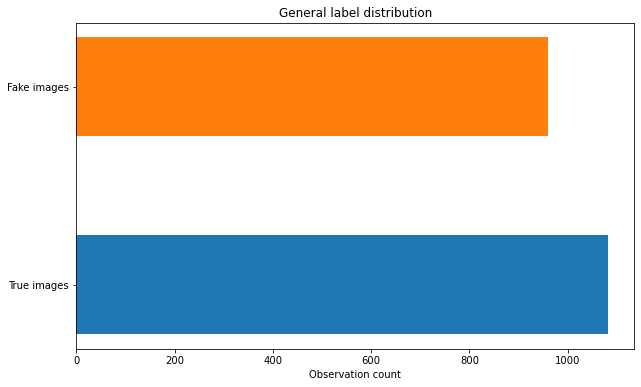

In [75]:
Universal().plot_proportions(y,"General label distribution")

Dataset contains two balanced classes. With almost equal amount of fakes and real images.

___
##### Train-val-test split
Split and shapes check. Did X_train split twice to get validation set.

In [4]:
X_train_temp,X_test,y_train_temp,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.1)
X_train,X_val,y_train,y_val=train_test_split(X_train_temp,y_train_temp,random_state=42,stratify=y_train_temp,test_size=0.11)
X_train.shape,y_train.shape,X_val.shape,y_val.shape, X_test.shape,y_test.shape

((1634, 600, 600, 3),
 (1634,),
 (202, 600, 600, 3),
 (202,),
 (205, 600, 600, 3),
 (205,))

Plot of class proportion for X_train

<Figure size 432x288 with 0 Axes>

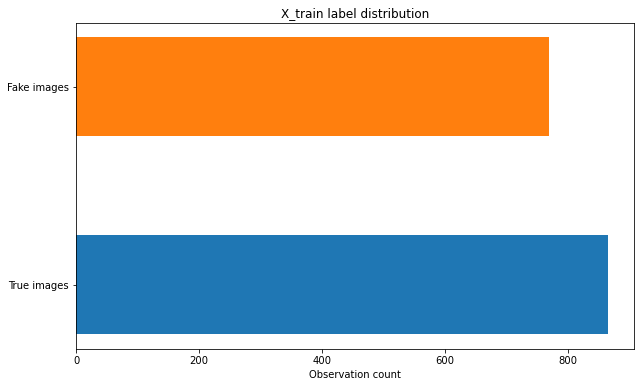

In [5]:
Universal().plot_proportions(y_train,"X_train label distribution")

Plot of class proportion for X_val

<Figure size 432x288 with 0 Axes>

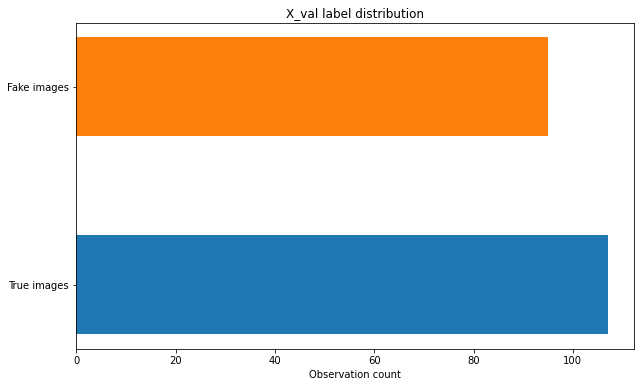

In [6]:
Universal().plot_proportions(y_val,"X_val label distribution")

Plot of class proportion for X_test

<Figure size 432x288 with 0 Axes>

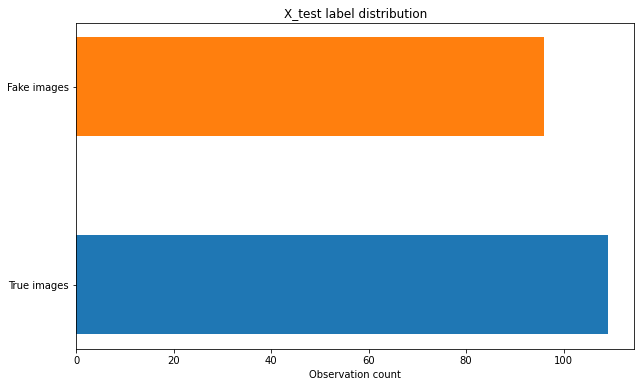

In [7]:
Universal().plot_proportions(y_test,"X_test label distribution")

Baseline accuracy

In [8]:
print (f"Baseline accuracy : {(y>0).mean(0)}")

Baseline accuracy : 0.5296423321901029


## Modeling
----
##### Simple model 
First of all let's try to run our data through simple CNN.

In [9]:
# very simple CNN
# wrap that contains sequence of layers
model_simple = Sequential()
# creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
model_simple.add(Conv2D(filters = 8, kernel_size = (8, 8), activation = 'relu', input_shape = (600, 600, 3)))
# calculates the maximum value in each patch of each feature map
model_simple.add(MaxPooling2D(pool_size = (3, 3)))
# creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
model_simple.add(Conv2D(filters = 8, kernel_size = (6, 6), activation = 'relu'))
# calculates the maximum value in each patch of each feature map
model_simple.add(MaxPooling2D(pool_size = (2, 2)))
# flattens the input, that model gets from pre-trained model
model_simple.add(Flatten())
# fully connected layer that that contains all the neurons, produces vector
model_simple.add(Dense(64, activation = 'relu'))
# output layer, that returns one value per input image - probability of class label
model_simple.add(Dense(1, activation = 'sigmoid'))
model_simple.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['acc'])
history_model_simple = model_simple.fit(
    X_train, y_train,
     batch_size = 32,
      epochs = 20,
       verbose = 1,
        validation_data = (X_val, y_val)
    )




Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-14 13:32:09.018591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 13:32:09.019284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2022-11-14 13:32:14.089090: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-14 13:32:14.686316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - ETA: 0s - loss: 0.6929 - acc: 0.5269

2022-11-14 13:32:31.510935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 18s 332ms/step - loss: 0.6929 - acc: 0.5269 - val_loss: 0.6958 - val_acc: 0.5297
Epoch 2/20
52/52 [==============================] - 17s 321ms/step - loss: 0.6925 - acc: 0.5294 - val_loss: 0.6959 - val_acc: 0.5297
Epoch 3/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6922 - acc: 0.5294 - val_loss: 0.6962 - val_acc: 0.5297
Epoch 4/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6920 - acc: 0.5294 - val_loss: 0.6964 - val_acc: 0.5297
Epoch 5/20
52/52 [==============================] - 17s 326ms/step - loss: 0.6919 - acc: 0.5294 - val_loss: 0.6966 - val_acc: 0.5297
Epoch 6/20
52/52 [==============================] - 17s 323ms/step - loss: 0.6917 - acc: 0.5294 - val_loss: 0.6969 - val_acc: 0.5297
Epoch 7/20
52/52 [==============================] - 17s 323ms/step - loss: 0.6916 - acc: 0.5294 - val_loss: 0.6971 - val_acc: 0.5297
Epoch 8/20
52/52 [==============================] - 17s 322ms/step - loss: 0.691

Model structure

In [ ]:
model_simple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 593, 593, 8)       1544      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 197, 197, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 96, 96, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_3 (Dense)             (None, 64)               

And generate summary plot.

2022-11-14 13:38:00.186947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 140ms/step


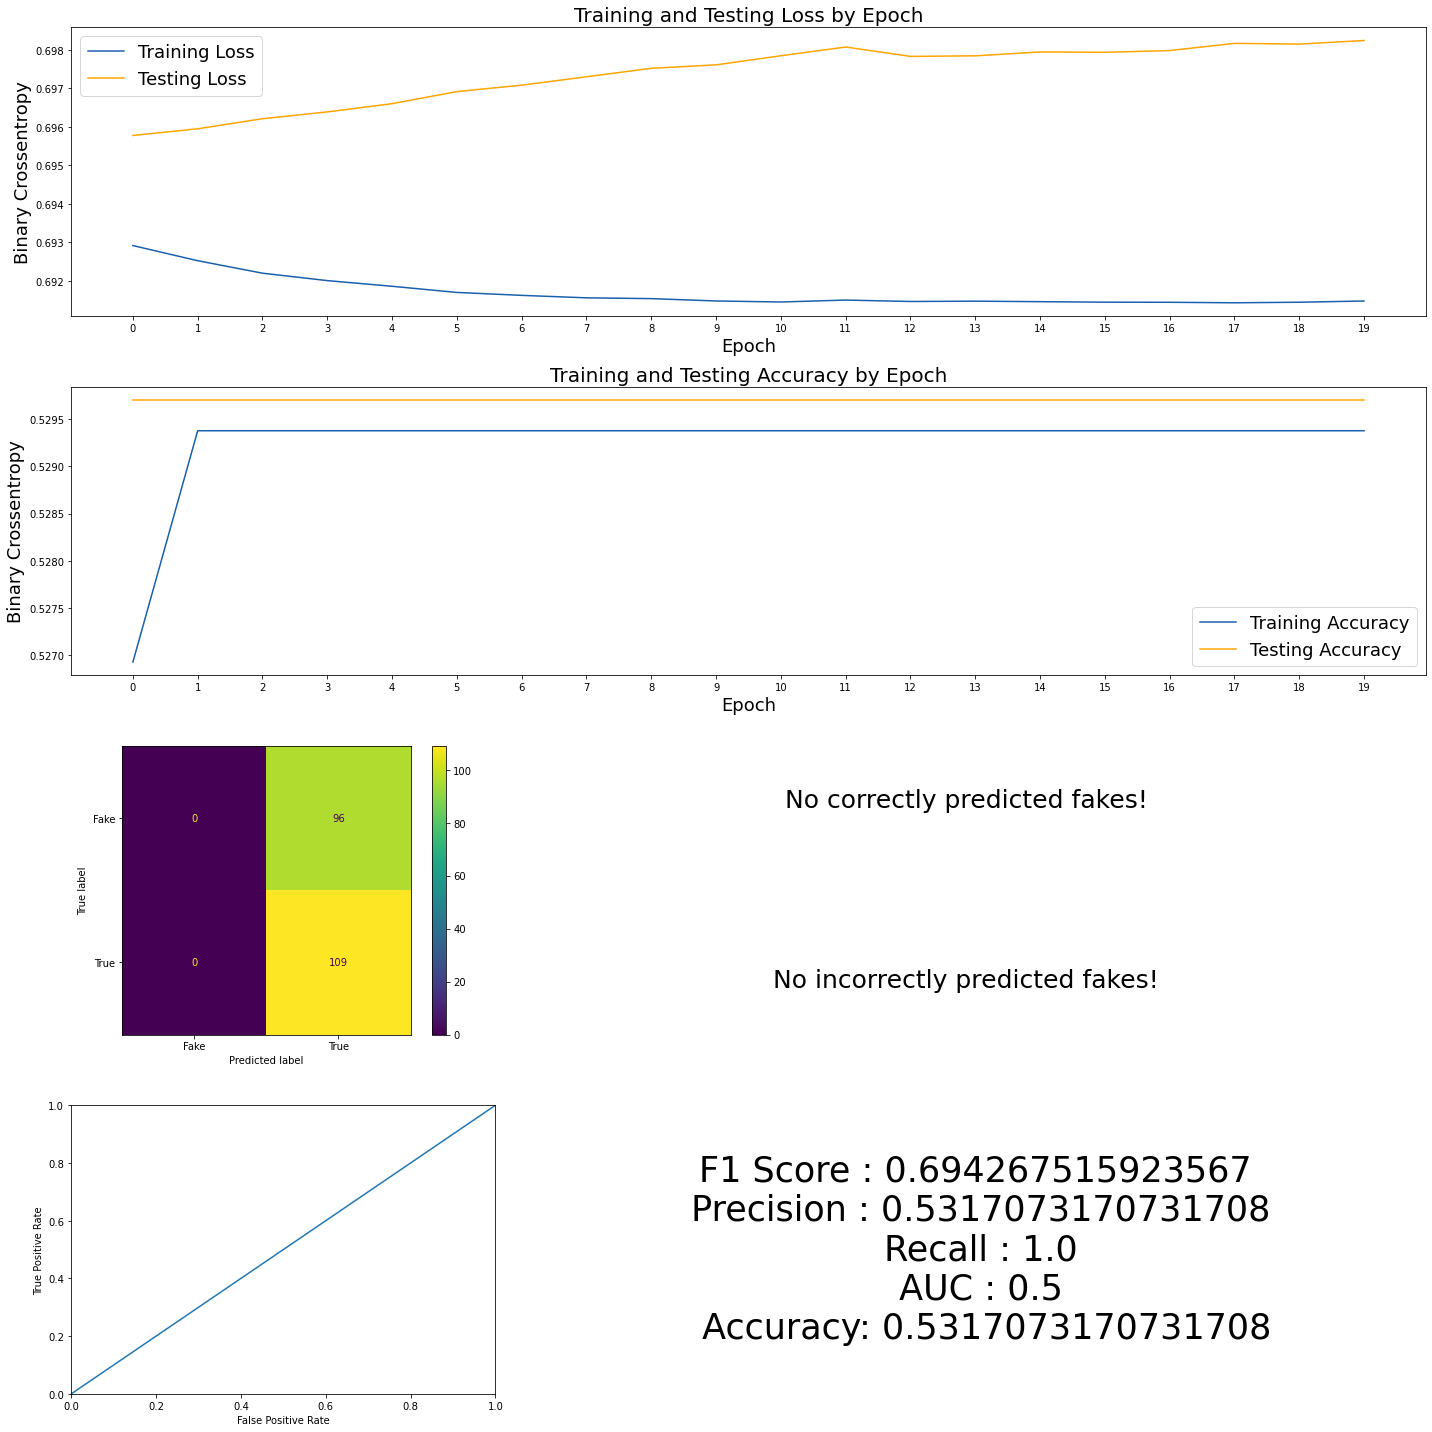

In [10]:
# Method I've developed to visualize all crucial modeling results on one plot. 
matches,mismatches,mismatches_real=Universal().plot_results_duo(history_model_simple,model_simple,X_test,y_test,"02/model_simple");

Confusion matrix shows that model can't effectively catch the signal to correctly recognize and predict fakes. 
X_test set totally contains 205 images, and model predicted that all of them are true/real images.   

ROC-AUC plot shows that true and false image sets are not just overlapping - for the model they are basically identical and it clearly doesn't learn as it should. This can be caused either by simplicity of the model, either by images which need more manipulation/augmentation to highlight their differences. 
To exclude model assumption, let's pass our dataset through much more powerful pre-trained model. 

Quick check of layer's output, using this image as an example.

(<matplotlib.image.AxesImage at 0x150021eb0>, 1.0)

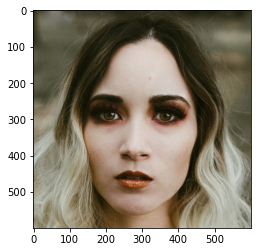

In [26]:
plt.imshow(X_test[6]),y_test[6]

First of all, let's check Grad-Cam to see which image pieces model found and gave a resulting probability of "fake" class in this case. In other words, it highlights the parts of the image that were used mostly by the model. 
It's a simple model, so basically we can say it captured border between different contrast zones.


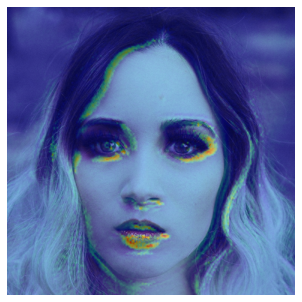

In [31]:
Universal().get_conv(model_simple,X_test[6],"02/model_simple_grad",alpha=0.4);

Next, I'll plot stages of image transformation  from layer to layer inside the model. We probably won't get much use out of this and this is one of the reasons, why neural networks are considered as "black boxed". But it is really good for basic understanding of how exactly convolutional layers work.

1/1 [==============================] - 0s 34ms/step


2022-11-13 16:54:22.538348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

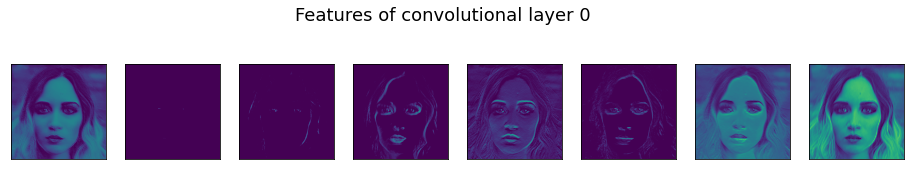

In [39]:
Universal().get_feat(model_simple,X_test[6],layer_num=0,savename="02/model_simple_features_conv_0");

1/1 [==============================] - 0s 83ms/step


2022-11-13 16:54:33.740001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

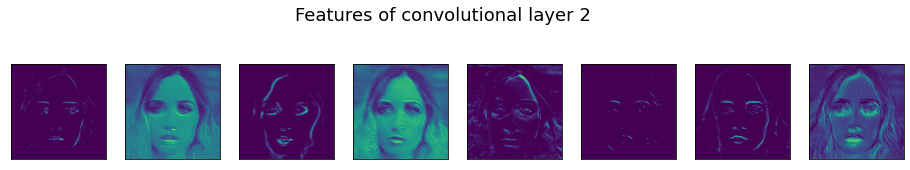

In [40]:
Universal().get_feat(model_simple,X_test[6],layer_num=2,savename="02/model_simple_features_conv_2");

These plots show how model's convolution layer sees images and what actual part of images are used for training



---
Filters

This is filter set for the first Conv layer. Each column represents filters for each color channel.
The dark squares indicate small weights, light squares represent large weights. Filters are in the size 8x8 pix, which is our kernel size on the Conv layer. A filter could be related to anything, one filter could be associated with seeing noses, and our nose filter would give us an indication of how strongly a nose seems to appear in our image, and how many times and in what locations they occur. This  means that when the location of these features changes it does not throw the neural network off.

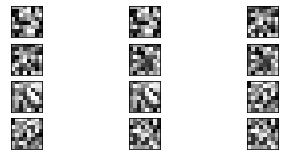

In [42]:
Universal().get_filters(model_simple,0,savename="02/model_simple_filters_conv_0")

Cleaning

In [17]:
# free-up memory
del model_simple
gc.collect()
tf.keras.backend.clear_session()

----

##### Pre-trained model

Now let's try our dataset on a much more complicated model with prelearned weights.

In [15]:
# creating an instance of a model with pre-trained  weights
pretrained_vgg = VGG19(input_shape=[600,600,3], include_top=False,weights="imagenet")
pretrained_vgg.trainable = False;

In [18]:
# wrap that contains sequence of layers
model_vgg=Sequential()
# adds layer with instance of pre-trained model
model_vgg.add(pretrained_vgg)
# flattens the input, that model gets from pre-trained model
model_vgg.add(Flatten())
# fully connected layer that that contains all the neurons, produces vector
model_vgg.add(Dense(128,activation="relu"))
model_vgg.add(Dense(64,activation="relu"))
# output layer, that returns one value per input image - probability of class label
model_vgg.add(Dense(1,activation="sigmoid"))
model_vgg.compile(loss="binary_crossentropy",optimizer='adam',metrics=['acc'])
history_vgg=model_vgg.fit(X_train,y_train,batch_size=16,validation_data=(X_val,y_val),epochs=8,verbose=1)


Epoch 1/8


2022-11-14 13:03:58.589911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 1.2578 - acc: 0.5061

2022-11-14 13:06:06.381728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 145s 1s/step - loss: 1.2578 - acc: 0.5061 - val_loss: 0.7810 - val_acc: 0.4703
Epoch 2/8
103/103 [==============================] - 142s 1s/step - loss: 0.7804 - acc: 0.4963 - val_loss: 0.6987 - val_acc: 0.4505
Epoch 3/8
103/103 [==============================] - 139s 1s/step - loss: 0.7739 - acc: 0.5049 - val_loss: 0.7839 - val_acc: 0.5297
Epoch 4/8
103/103 [==============================] - 139s 1s/step - loss: 0.7280 - acc: 0.5024 - val_loss: 0.7266 - val_acc: 0.5297
Epoch 5/8
103/103 [==============================] - 139s 1s/step - loss: 0.7518 - acc: 0.4951 - val_loss: 0.6974 - val_acc: 0.5297
Epoch 6/8
103/103 [==============================] - 140s 1s/step - loss: 0.7222 - acc: 0.5147 - val_loss: 0.7953 - val_acc: 0.5297
Epoch 7/8
103/103 [==============================] - 142s 1s/step - loss: 0.7010 - acc: 0.5233 - val_loss: 0.9589 - val_acc: 0.5297
Epoch 8/8
103/103 [==============================] - 140s 1s/step - loss: 0.7060 - acc

In [13]:
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 18, 18, 512)       20024384  
                                                                 
 flatten_1 (Flatten)         (None, 165888)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               21233792  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41,266,497
Trainable params: 21,242,113
Non-trainable params: 20,024,384
_________________________________________________________________


Generating summary

2022-11-14 13:28:12.081433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 20s 3s/step


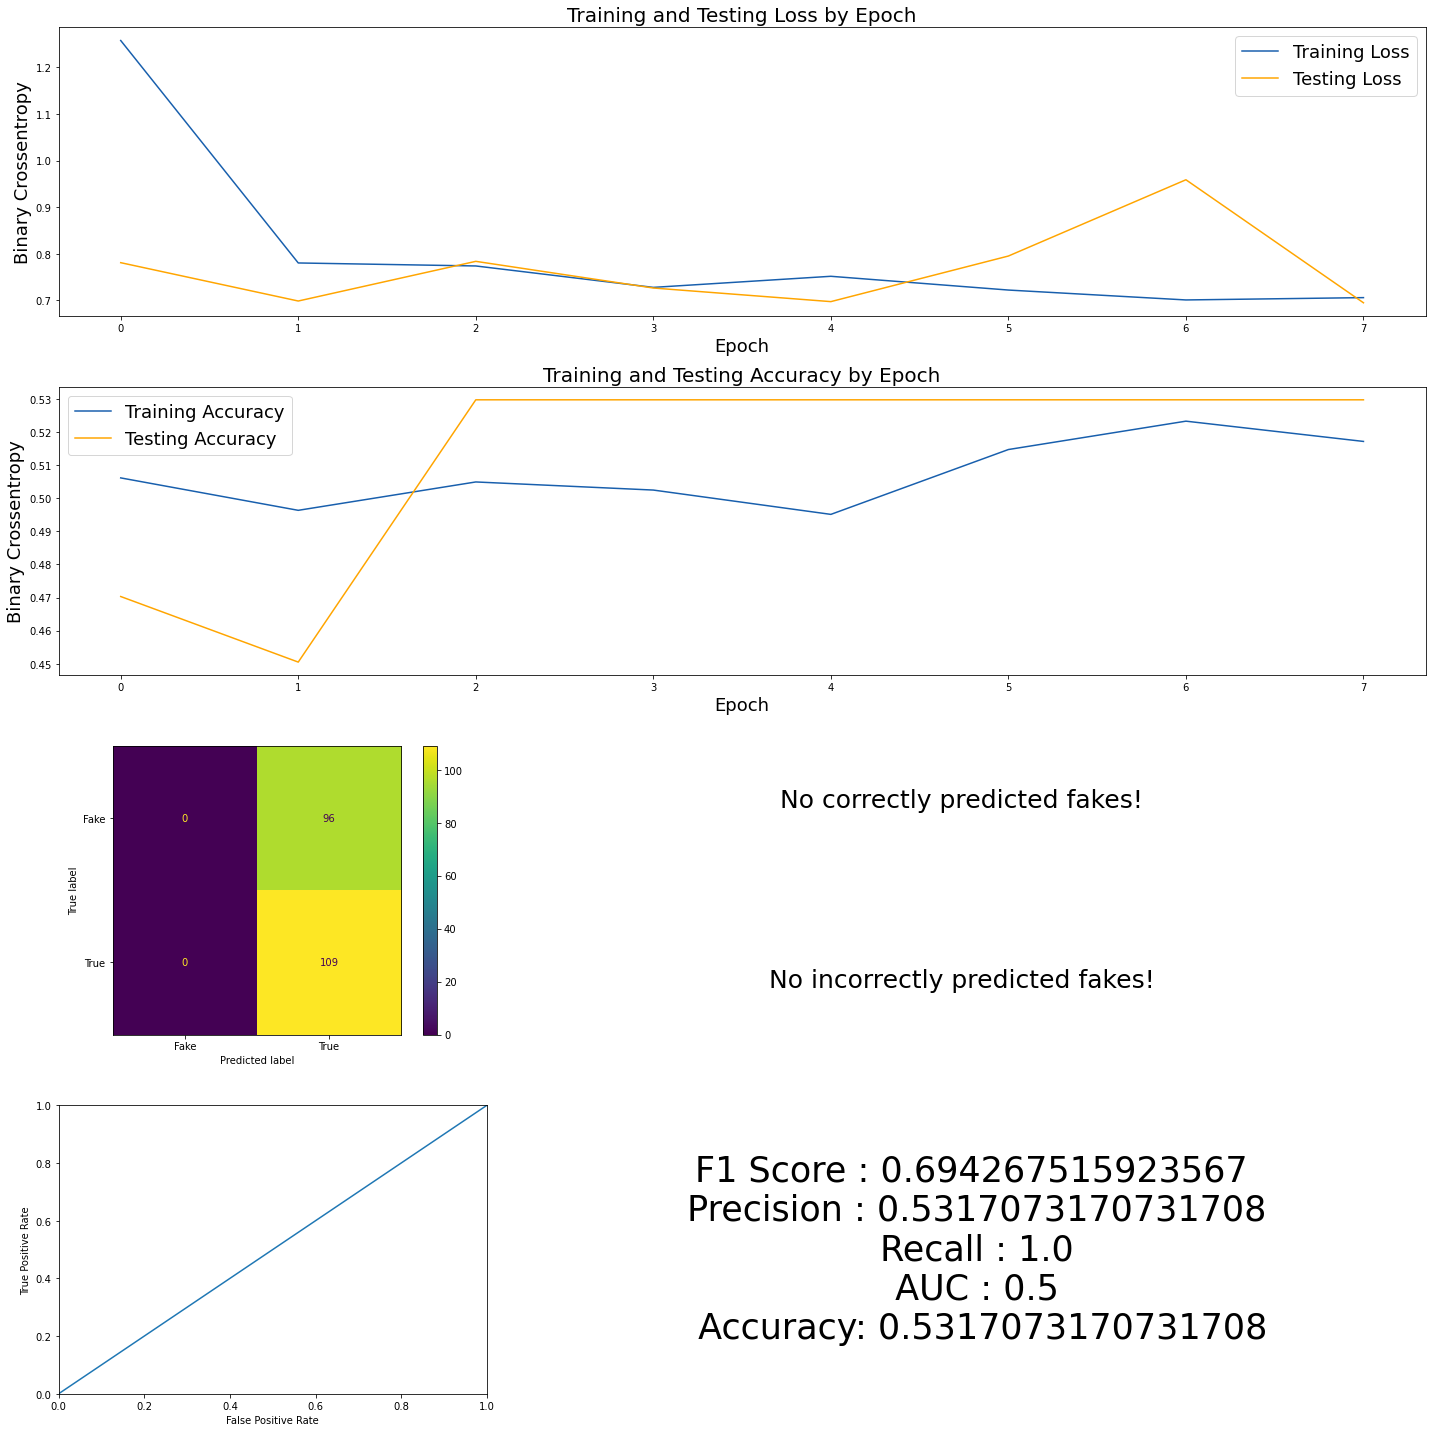

In [21]:
matches_2,mismatches_2, plot=Universal().plot_results_duo(history_vgg,model_vgg,X_test,y_test,"02/VGG");

Summary shows, that results of modeling are really close to the simple model. Despite, VGG is trying to catch some signal, it is not able to recognize difference between two classes. Performance of the model is equal to baseline model accuracy.

Cleaning

In [ ]:
# free-up memory
del model_vgg
gc.collect()
tf.keras.backend.clear_session()

----
##### Pretrained model 2

As second pre-trained model, I'll use EfficientNetB4, it was used by a lot of Kaggle and Facebook competition winners. It has input size 380x380 so I'll re-generate dataset in that size, using this parameter.

In [2]:
X_380,y_380,class_labels=Universal().get_images(size=380)
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

Creating new X_train, X_val, X_test sets at 380x380 size.

In [3]:
X_train_temp_380,X_test_380,y_train_temp_380,y_test_380=train_test_split(X_380,y_380,random_state=42,stratify=y_380,test_size=0.1)
X_train_380,X_val_380,y_train_380,y_val_380=train_test_split(X_train_temp_380,y_train_temp_380,random_state=42,stratify=y_train_temp_380,test_size=0.11)
X_train_380.shape,y_train_380.shape,X_val_380.shape,y_val_380.shape, X_test_380.shape,y_test_380.shape

((1634, 380, 380, 3),
 (1634,),
 (202, 380, 380, 3),
 (202,),
 (205, 380, 380, 3),
 (205,))

Creating an instance of a EfficientNetB4 model.

In [4]:
# creating an instance of a model with pre-trained  weights
eff_net = EfficientNetB4(include_top=False, weights='imagenet',input_shape=(380,380,3))
eff_net.trainable=False

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-14 13:39:01.451732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 13:39:01.452024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


And fitting the dataset

In [5]:
# wrap that contains sequence of layers
model_eff=Sequential()
# adds layer with instance of pre-trained model
model_eff.add(eff_net)
# flattens the input, that model gets from pre-trained model
model_eff.add(Flatten())
# fully connected layer that that contains all the neurons and produces vector
model_eff.add(Dense(128,activation="relu"))
model_eff.add(Dense(64,activation="relu"))
# output layer, that returns one value per input image - probability of class label
model_eff.add(Dense(1,activation="sigmoid"))
model_eff.compile(loss="binary_crossentropy",optimizer='adam',metrics=['acc'])
history_model_eff=model_eff.fit(X_train_380,y_train_380,batch_size=16,validation_data=(X_val_380,y_val_380),epochs=10,verbose=1)


Epoch 1/10


2022-11-14 13:39:12.129895: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-14 13:39:17.936664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 3.7917 - acc: 0.5171

2022-11-14 13:40:18.597092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 78s 653ms/step - loss: 3.7917 - acc: 0.5171 - val_loss: 8.0016 - val_acc: 0.5297
Epoch 2/10
103/103 [==============================] - 57s 556ms/step - loss: 2.1815 - acc: 0.5080 - val_loss: 0.7581 - val_acc: 0.4703
Epoch 3/10
103/103 [==============================] - 58s 560ms/step - loss: 0.9615 - acc: 0.5055 - val_loss: 1.1703 - val_acc: 0.5297
Epoch 4/10
103/103 [==============================] - 61s 586ms/step - loss: 0.8514 - acc: 0.4994 - val_loss: 0.8847 - val_acc: 0.4703
Epoch 5/10
103/103 [==============================] - 56s 546ms/step - loss: 0.7866 - acc: 0.5263 - val_loss: 0.6924 - val_acc: 0.4802
Epoch 6/10
103/103 [==============================] - 56s 545ms/step - loss: 0.9279 - acc: 0.4878 - val_loss: 0.7155 - val_acc: 0.5297
Epoch 7/10
103/103 [==============================] - 57s 548ms/step - loss: 0.7794 - acc: 0.5086 - val_loss: 1.3237 - val_acc: 0.5297
Epoch 8/10
103/103 [==============================] - 56s 544ms/st

In [6]:
model_eff.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 12, 12, 1792)     17673823  
                                                                 
 flatten (Flatten)           (None, 258048)            0         
                                                                 
 dense (Dense)               (None, 128)               33030272  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 50,712,416
Trainable params: 33,038,593
Non-trainable params: 17,673,823
_________________________________________________________________


2022-11-14 13:49:05.904920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 15s 1s/step


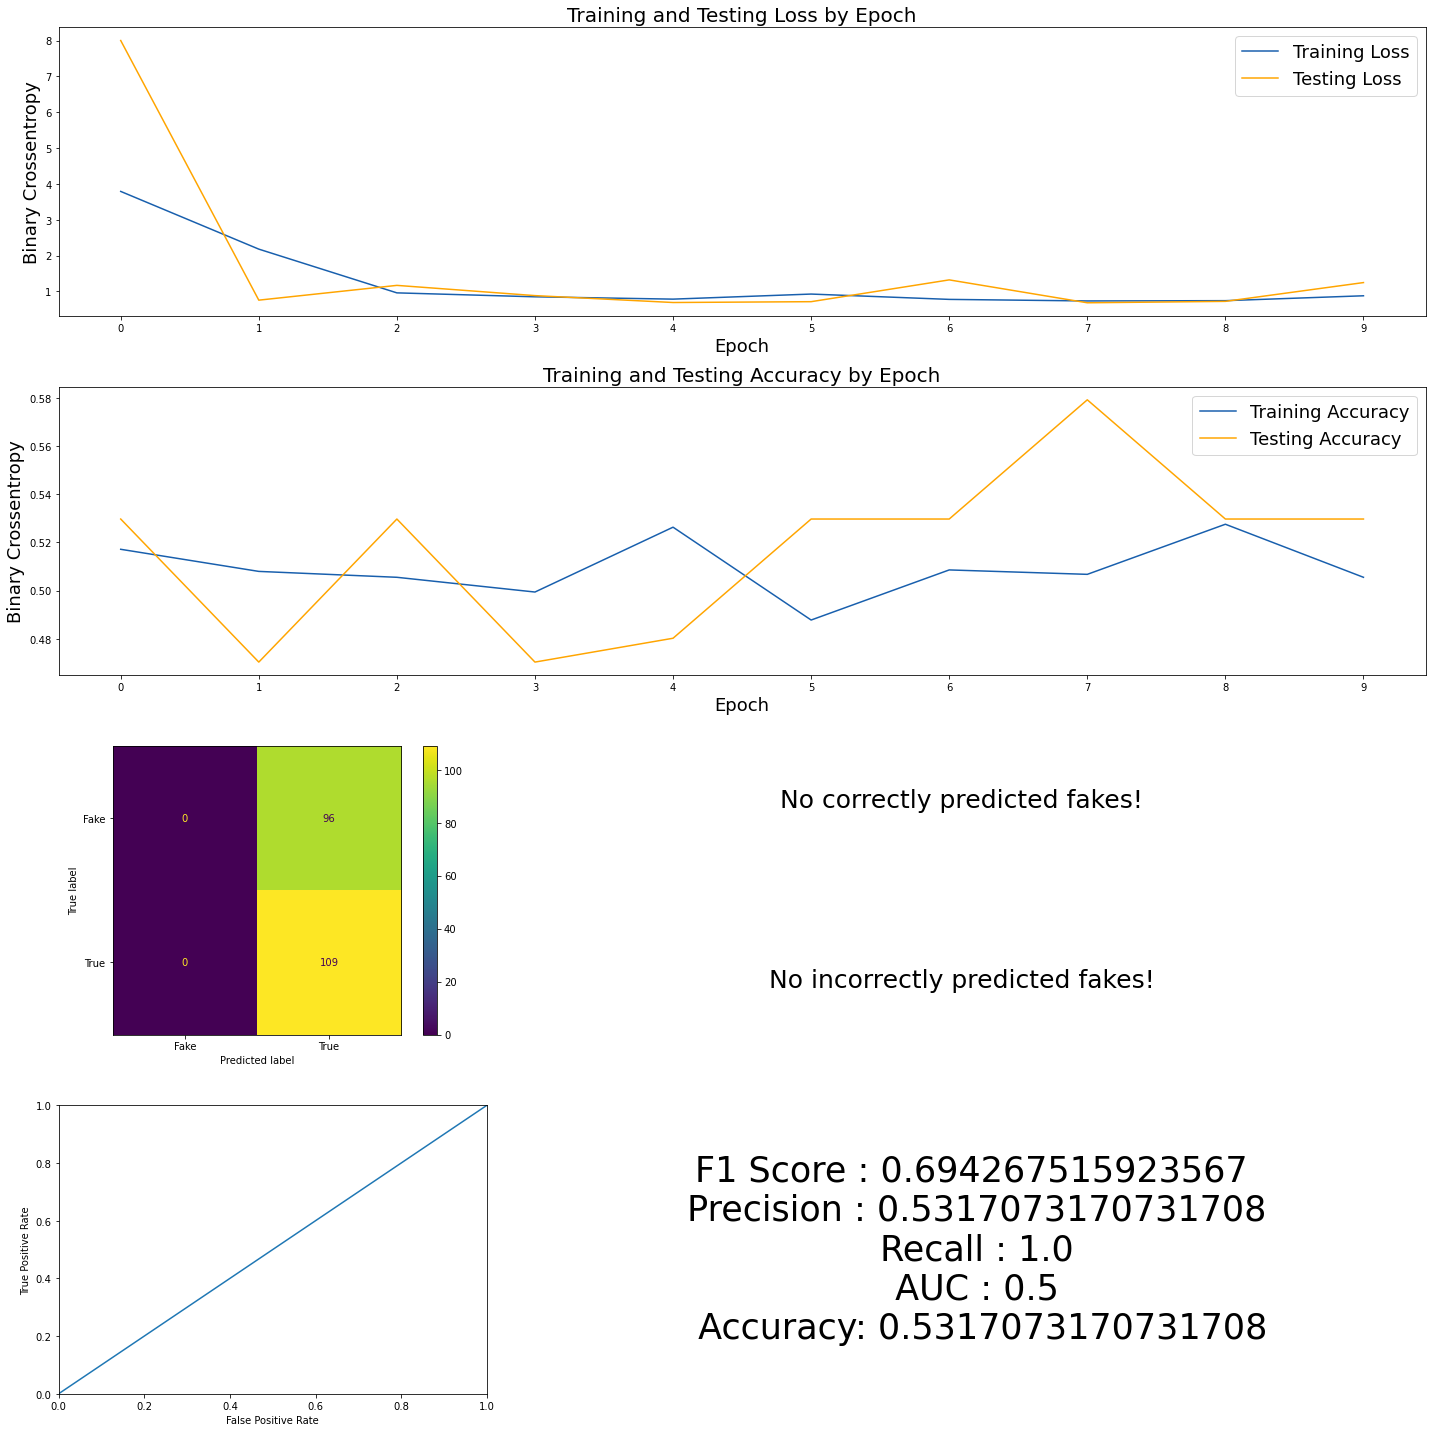

In [7]:
matches_3,mismatches_3, plot=Universal().plot_results_duo(history_model_eff,model_eff,X_test_380,y_test_380,"02/EfficientNetB4");

Still no good results, but we can see on accuracy subplot that model started learning, and model ran much faster because of the smaller dataset size. Although it is close to vgg performance, I'd say, we have some improvements.

Cleaning

In [8]:
# free-up memory
del model_eff
gc.collect()
tf.keras.backend.clear_session()

----
##### Custom Model
Got some ideas on building a model from this account: https://github.com/nii-yamagishilab/

So, my next attempt will be custom model with a much smaller input images size. That will increase iteration speed and will let me to manually adjust layers.
<p> First of all, I'll generate dataset on a 150x150 size.

In [9]:
X_150,y_150,class_labels=Universal().get_images(size=150)
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

Train-val-test split

In [10]:
X_train_temp_150,X_test_150,y_train_temp_150,y_test_150=train_test_split(X_150,y_150,random_state=42,stratify=y_150,test_size=0.1)
X_train_150,X_val_150,y_train_150,y_val_150=train_test_split(X_train_temp_150,y_train_temp_150,random_state=42,stratify=y_train_temp_150,test_size=0.11)
X_train_150.shape,y_train_150.shape,X_val_150.shape,y_val_150.shape, X_test_150.shape,y_test_150.shape

((1634, 150, 150, 3),
 (1634,),
 (202, 150, 150, 3),
 (202,),
 (205, 150, 150, 3),
 (205,))

Building a model

In [58]:


# wrap that contains sequence of layers
model_custom=Sequential()
# creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
model_custom.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation = 'relu',use_bias=True,input_shape = (150, 150, 3)))
# standardize the inputs to a network, accelerates training, provides some regularization
model_custom.add(BatchNormalization())
# calculates the maximum value in each patch of each feature map
model_custom.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
model_custom.add(Conv2D(8, (5, 5), padding='same', activation = 'relu',use_bias=True))
# standardize the inputs to a network, accelerates training, provides some regularization
model_custom.add(BatchNormalization())
# calculates the maximum value in each patch of each feature map
model_custom.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
model_custom.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
# standardize the inputs to a network, accelerates training, provides some regularization
model_custom.add(BatchNormalization())
# calculates the maximum value in each patch of each feature map
model_custom.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
model_custom.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
# standardize the inputs to a network, accelerates training, provides some regularization
model_custom.add(BatchNormalization())
# calculates the maximum value in each patch of each feature map
model_custom.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
# flattens the input, that model gets from pre-trained model
model_custom.add(Flatten())
# randomly sets input units to 0 with a given frequency (here 0.5) to prevent overfitting
model_custom.add(Dropout(0.5))
# fully connected layer that contains all the neurons, produces vector
model_custom.add(Dense(16,kernel_regularizer =tf.keras.regularizers.l2(l=0.005)))
# activation function with a small slope for negative values instead of a flat slope, helps with sparse gradients
model_custom.add(LeakyReLU(alpha=0.1))
# randomly sets input units to 0 with a given frequency (here 0.5) to prevent overfitting
model_custom.add(Dropout(0.5))
# output layer, that returns one value per input image - probability of class label
model_custom.add(Dense(1, activation = 'sigmoid'))
model_custom.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
history_custom=model_custom.fit(X_train_150, y_train_150, batch_size = 128, epochs = 25, verbose = 1, validation_data = (X_val_150, y_val_150))


Epoch 1/25


2022-11-14 14:40:25.769958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 1.2552 - acc: 0.5190

2022-11-14 14:40:29.157018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 5s 209ms/step - loss: 1.2552 - acc: 0.5190 - val_loss: 0.8412 - val_acc: 0.5297
Epoch 2/25
13/13 [==============================] - 1s 107ms/step - loss: 0.9469 - acc: 0.5263 - val_loss: 0.8498 - val_acc: 0.4554
Epoch 3/25
13/13 [==============================] - 1s 87ms/step - loss: 0.9123 - acc: 0.5073 - val_loss: 0.8610 - val_acc: 0.4653
Epoch 4/25
13/13 [==============================] - 1s 75ms/step - loss: 0.9152 - acc: 0.5233 - val_loss: 0.8667 - val_acc: 0.4653
Epoch 5/25
13/13 [==============================] - 1s 72ms/step - loss: 0.8822 - acc: 0.5251 - val_loss: 0.8734 - val_acc: 0.4703
Epoch 6/25
13/13 [==============================] - 1s 78ms/step - loss: 0.8683 - acc: 0.5502 - val_loss: 0.8958 - val_acc: 0.4703
Epoch 7/25
13/13 [==============================] - 1s 75ms/step - loss: 0.8594 - acc: 0.5404 - val_loss: 0.8752 - val_acc: 0.4703
Epoch 8/25
13/13 [==============================] - 1s 75ms/step - loss: 0.8314 - acc: 0.556

You can see some noticeable features, like leaky ReLU, that is helpful in tasks where we may suffer from sparse gradients and batchNormalization instead of dropout for graphics processing layers,that reducing the number of training epochs required to train deep networks.

Generating model summary

In [45]:
model_custom.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 8)       224       
                                                                 
 batch_normalization_4 (Batc  (None, 150, 150, 8)      32        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 8)         1608      
                                                                 
 batch_normalization_5 (Batc  (None, 75, 75, 8)        32        
 hNormalization)                                                 
                                                      

1/7 [===>..........................] - ETA: 1s

2022-11-14 14:40:56.019099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 35ms/step


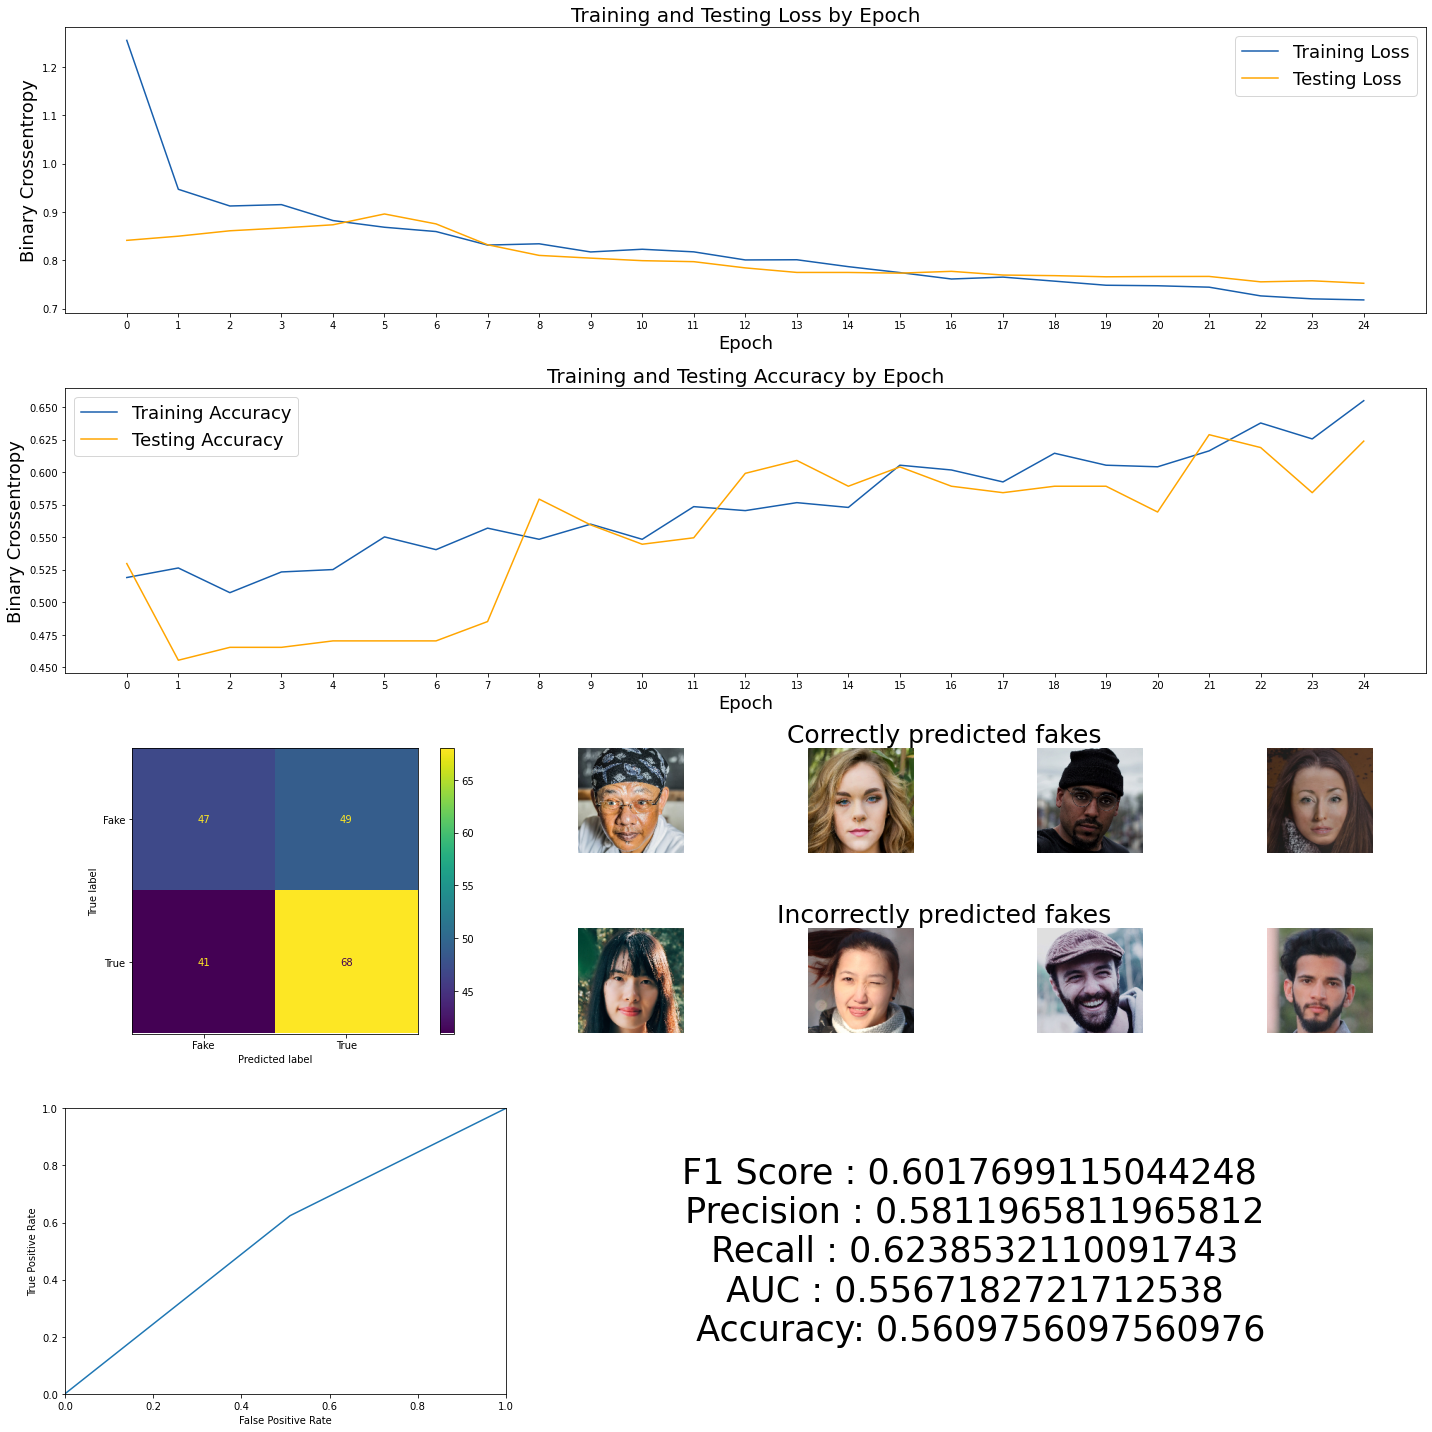

In [59]:
matches_4,mismatches_4,mismatches_real_4=Universal().plot_results_duo(history_custom,model_custom,X_test_150,y_test_150,"02/custom_model");

Finally we have some good results.
Model started to differentiate two classes and make correct predictions.
All scores are beyond baseline.

Although, due to AUC score, both classes are very similar/overlapped for the model, it definitely made some progress at differentiating them.

Let's take a more detailed look at matched and mismatched images.
___
First, let's plot images correctly predicted as fakes.

<Figure size 432x288 with 0 Axes>

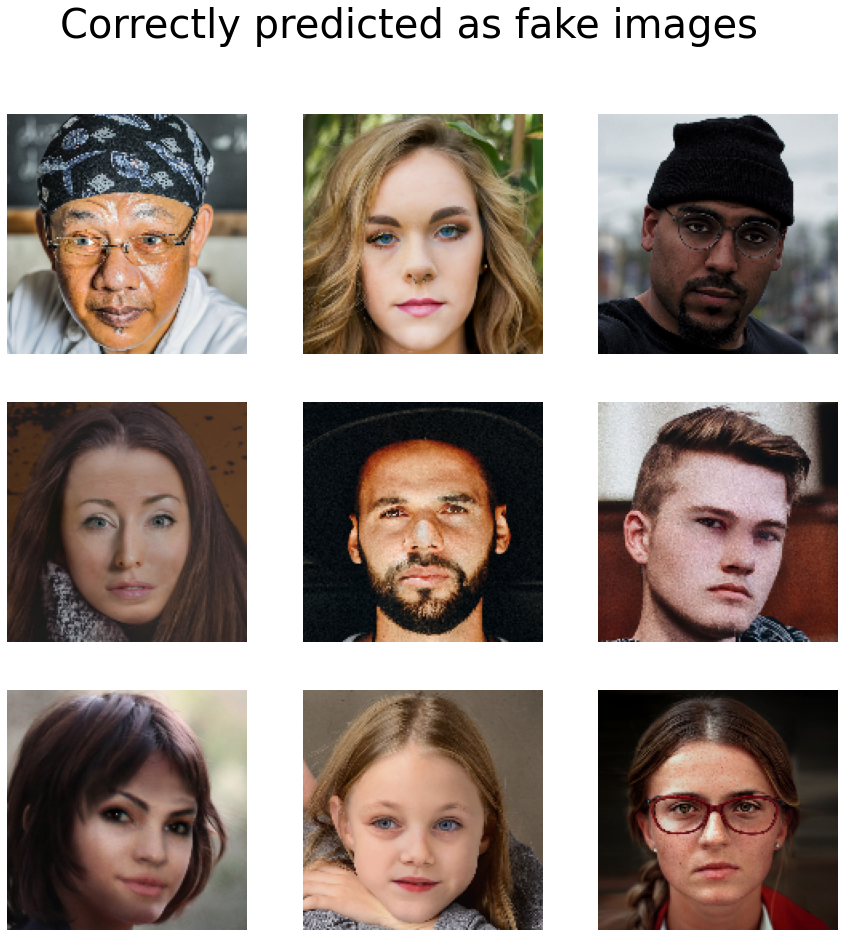

In [60]:
# getting images due to their index in match list
matches_custom=[X_test_150[x] for x in matches_4]
# generates a plot and saving result
Universal().plot_samples(matches_custom,9,3,"Correctly predicted as fake","02/corr_pred_as_fake_custom_example");

It's hard to tell if there are any common feature. It seems, that we have mostly easy and mid fake levels here.
___
Let's take a look at mismatches then. These are fakes predicted as real images.

<Figure size 432x288 with 0 Axes>

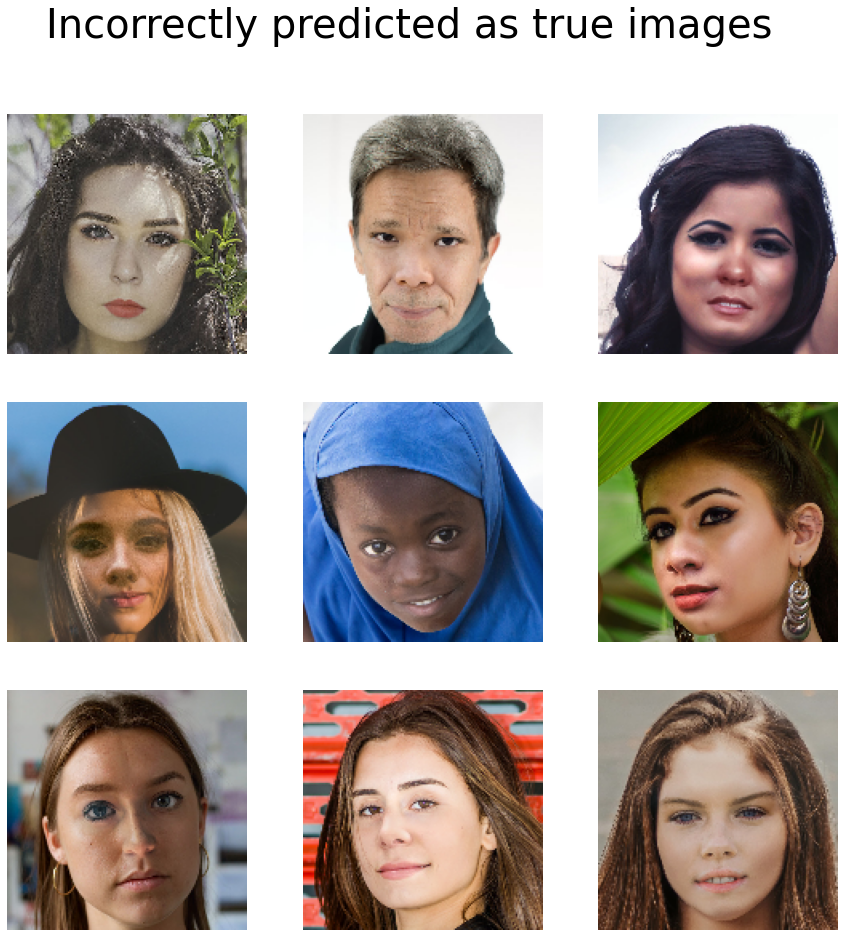

In [61]:
# getting images due to their index in mismatch list
mismatches_custom=[X_test_150[x] for x in mismatches_real_4]
# generates a plot and saving result
Universal().plot_samples(mismatches_custom,9,3,"Incorrectly predicted as true","02/incorr_pred_as_true_custom_example");

Similarly to matches, it's hard to highlight common feature for mismatches, fake types are mixed, so as color schemes, photo perspective, facetype due to sex, etc. Let's look at the hidden layers output of the incorrectly predicted fake image.

1/1 [==============================] - 0s 73ms/step


2022-11-14 14:41:25.308981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

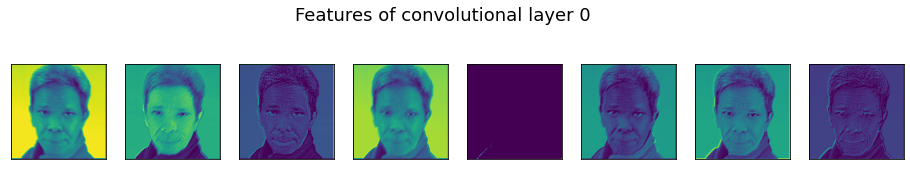

In [62]:
Universal().get_feat(model_custom,X_test_150[mismatches_real_4[1]],layer_num=0,savename="02/model_best_features_conv_0");

Each convolution layer trying to find good features in image and pass it to the next layer.

1/1 [==============================] - 0s 88ms/step


2022-11-14 14:41:25.633184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

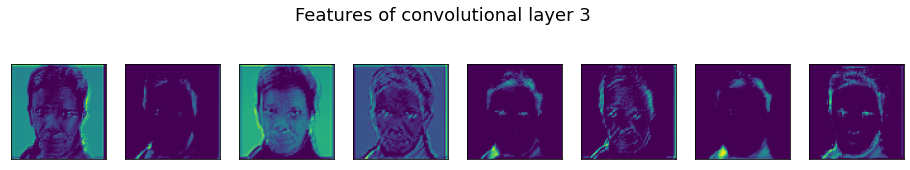

In [63]:
Universal().get_feat(model_custom,X_test_150[mismatches_real_4[1]],layer_num=3,savename="02/model_best_features_conv_3");

1/1 [==============================] - 0s 123ms/step


2022-11-14 14:41:25.928441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

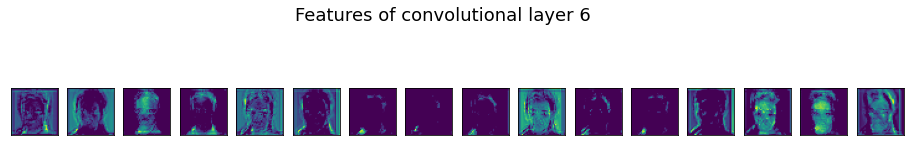

In [64]:
Universal().get_feat(model_custom,X_test_150[mismatches_real_4[1]],layer_num=6,savename="02/model_best_features_conv_6");

As image passes from layer to layer it changes due to max_pooling and feature extraction. The more layers the model has, 
the more output image will be changed.

1/1 [==============================] - 0s 50ms/step


2022-11-14 14:41:26.364773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

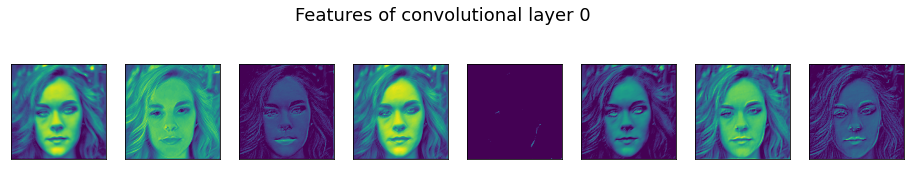

In [65]:
Universal().get_feat(model_custom,X_test_150[matches_4[1]],0,savename="02/model_best_features_conv_0_mismatch");

1/1 [==============================] - 0s 88ms/step


2022-11-14 14:41:26.638396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

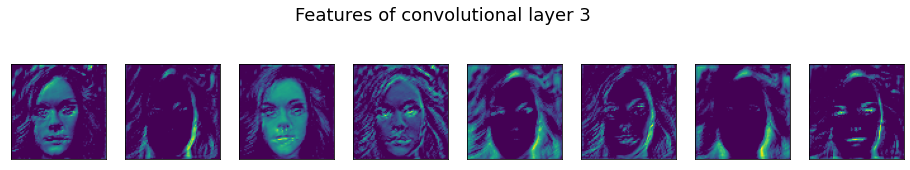

In [66]:
Universal().get_feat(model_custom,X_test_150[matches_4[1]],3,savename="02/model_best_features_conv_3_mismatch");

1/1 [==============================] - 0s 120ms/step


2022-11-14 14:41:26.959352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

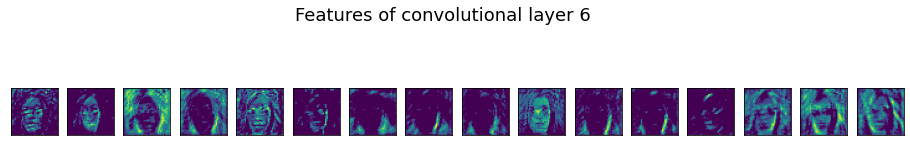

In [67]:
Universal().get_feat(model_custom,X_test_150[matches_4[1]],6,savename="02/model_best_features_conv_6_mismatch");

1/1 [==============================] - 0s 185ms/step


2022-11-14 14:41:27.396859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

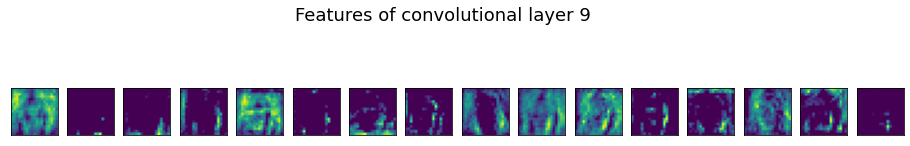

In [68]:
Universal().get_feat(model_custom,X_test_150[matches_4[1]],9,savename="02/model_best_features_conv_9_mismatch");

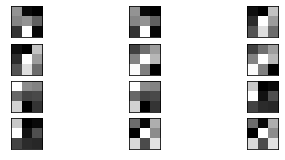

In [69]:
Universal().get_filters(model_custom,0,savename="02/best_model_filters")

 Incorrectly predicted fake image GRAD-CAM.

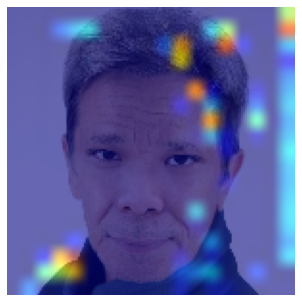

In [70]:
Universal().get_conv(model_custom,X_test_150[mismatches_real_4[1]],"02/model_custom_filters_mismatch");

Correctly predicted fake image GRAD-CAM.

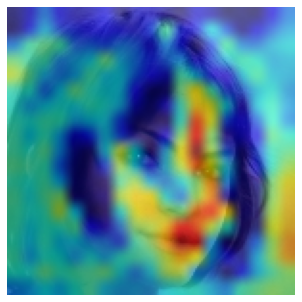

In [71]:

Universal().get_conv(model_custom,X_test_150[matches_4[6]],"02/model_custom_filters");


GradCam provides visual explanation on the modeling result. It graphically shows, which parts of the image were mostly used by the model to make predictions. For the first fake, model mostly used parts of image, that are not relevant to modified zone (which is at the nose area). 
And for the second, we can see correctly defined relevant zones located all over the face, which led to correct prediction.


Final cleaning

In [72]:
# free-up memory
del model_custom
gc.collect()
tf.keras.backend.clear_session()

___
##### Intermediate conclusion
Finally, we have a robust result. Difference in scores between first three models and the last one shows, that change of input images positively affected model performance, in addition to much less time needed to process. I will use this last model as a production one. It gave me the best results,it really "catches the signal" and differences classes.
As a next step, I'll try to improve it's performance with augmentation technics and analyze results more deeply.